In [8]:
import random
import matplotlib.pyplot as plt



In [7]:
WIN_COMBOS = [
    (0,1,2),(3,4,5),(6,7,8),
    (0,3,6),(1,4,7),(2,5,8),
    (0,4,8),(2,4,6)
]

def empty_board():
    return [0] * 9

def available_moves(board):
    return [i for i in range(9) if board[i] == 0]

def make_move(board, index, player):
    board[index] = player

def check_winner(board):
    for a, b, c in WIN_COMBOS:
        if board[a] == board[b] == board[c] != 0:
            return board[a]
    return 0

def is_draw(board):
    return 0 not in board and check_winner(board) == 0


In [3]:

# Random Player
def random_player(board):
    return random.choice(available_moves(board))


In [4]:
state_values = {}

def policy_player(board, player, epsilon=0.1):
    moves = available_moves(board)

    # exploration
    if random.random() < epsilon:
        return random.choice(moves)

    best_value = -999
    best_move = None

    for move in moves:
        new_board = board.copy()
        new_board[move] = player
        value = state_values.get(tuple(new_board), 0)

        if value > best_value:
            best_value = value
            best_move = move

    return best_move


In [5]:
def train(episodes=30000, alpha=0.1):
    win_rates = []
    wins = 0

    for episode in range(episodes):
        board = empty_board()
        states = []
        player = 1  # policy = O

        while True:
            if player == 1:
                move = policy_player(board, player, epsilon=0.2)
            else:
                move = random_player(board)

            make_move(board, move, player)
            states.append(tuple(board))

            winner = check_winner(board)
            if winner != 0 or is_draw(board):
                if winner == 1:
                    reward = 1
                    wins += 1
                elif winner == -1:
                    reward = -1
                else:
                    reward = 0
                break

            player *= -1

        # backpropagate reward
        for state in reversed(states):
            old_value = state_values.get(state, 0)
            state_values[state] = old_value + alpha * (reward - old_value)
            reward *= 0.9

        if episode % 1000 == 0 and episode != 0:
            win_rates.append(wins / 1000)
            wins = 0

    return win_rates


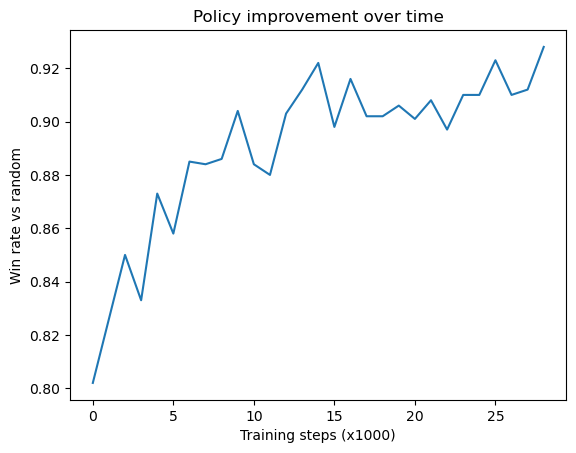

In [6]:
win_rates = train()

plt.plot(win_rates)
plt.xlabel("Training steps (x1000)")
plt.ylabel("Win rate vs random")
plt.title("Policy improvement over time")
plt.show()
